<a href="https://colab.research.google.com/github/RickyMacharm/Cassava/blob/master/TUBI_cassava.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'fastai-v3/'

Mounted at /content/gdrive


In [0]:
!mkdir -p ~/.kaggle
!cp ../kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [0]:
from fastai import *
from fastai.vision import *

In [0]:
path = Path('/content/gdrive/My Drive/fastai-v3/cassava/')
path.mkdir(exist_ok=True)
path.ls()

[]

In [0]:
!kaggle competitions list

ref                                                deadline             category            reward  teamCount  userHasEntered  
-------------------------------------------------  -------------------  ---------------  ---------  ---------  --------------  
digit-recognizer                                   2030-01-01 00:00:00  Getting Started  Knowledge       3023            True  
titanic                                            2030-01-01 00:00:00  Getting Started  Knowledge      11418            True  
house-prices-advanced-regression-techniques        2030-01-01 00:00:00  Getting Started  Knowledge       4589           False  
imagenet-object-localization-challenge             2029-12-31 07:00:00  Research         Knowledge         37           False  
competitive-data-science-predict-future-sales      2019-12-31 23:59:00  Playground           Kudos       3133           False  
recognizing-faces-in-the-wild                      2019-08-01 23:59:00  Playground       Knowledge      

In [0]:
!kaggle competitions download -c cassava-disease -p '/content/gdrive/My Drive/fastai-v3/cassava/'

  0% 0.00/83.8k [00:00<?, ?B/s]
100% 83.8k/83.8k [00:00<00:00, 5.81MB/s]
100% 513M/515M [00:05<00:00, 79.9MB/s]
100% 515M/515M [00:05<00:00, 90.9MB/s]
 99% 769M/777M [00:10<00:00, 78.3MB/s]
100% 777M/777M [00:10<00:00, 74.3MB/s]
 99% 1.03G/1.04G [00:17<00:00, 53.7MB/s]
100% 1.04G/1.04G [00:17<00:00, 64.4MB/s]


In [0]:
path = Path("/content/gdrive/My Drive/fastai-v3/cassava/")
path.ls()

[PosixPath('/content/gdrive/My Drive/fastai-v3/cassava/sample_submission_file.csv'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/cassava/test.zip'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/cassava/train.zip'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/cassava/extraimages.zip')]

In [0]:
#Unzip Files
!unzip -q -n '/content/gdrive/My Drive/fastai-v3/cassava'/train.zip -d '/content/gdrive/My Drive/fastai-v3/cassava'/train
!unzip -q -n  '/content/gdrive/My Drive/fastai-v3/cassava'/test.zip -d '/content/gdrive/My Drive/fastai-v3/cassava'/test
!unzip -q -n '/content/gdrive/My Drive/fastai-v3/cassava'/extraimages.zip -d '/content/gdrive/My Drive/fastai-v3/cassava'/extraimages

In [0]:
#Delete archive
!rm '/content/gdrive/My Drive/fastai-v3/cassava'/train.zip
!rm '/content/gdrive/My Drive/fastai-v3/cassava'/test.zip
!rm '/content/gdrive/My Drive/fastai-v3/cassava'/extraimages.zip
path.ls()

[PosixPath('/content/gdrive/My Drive/fastai-v3/cassava/sample_submission_file.csv'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/cassava/train'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/cassava/test'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/cassava/extraimages')]

In [0]:
df = pd.read_csv(path/'sample_submission_file.csv')
df.head().T

,0,1,2,3,4
Category,cbsd,cmd,cbb,cmd,cbsd
Id,test-img-0.jpg,test-img-1.jpg,test-img-2.jpg,test-img-3.jpg,test-img-4.jpg


In [0]:
!ls '/content/gdrive/My Drive/fastai-v3/cassava'/extraimages/extraimages | head -5 

#not sure how to handle this unclassfied extra images

extra-image-10000.jpg
extra-image-10001.jpg
extra-image-10002.jpg
extra-image-10004.jpg
extra-image-10005.jpg


In [0]:
data =  ImageDataBunch.from_folder(path=path/'train', train='.', valid_pct=.20,test = path/'test',
                                  ds_tfms= get_transforms(), size = 224,bs = 64).normalize(imagenet_stats)
print(data.classes)
print(data.c)

['cbb', 'cbsd', 'cgm', 'cmd', 'healthy']
5


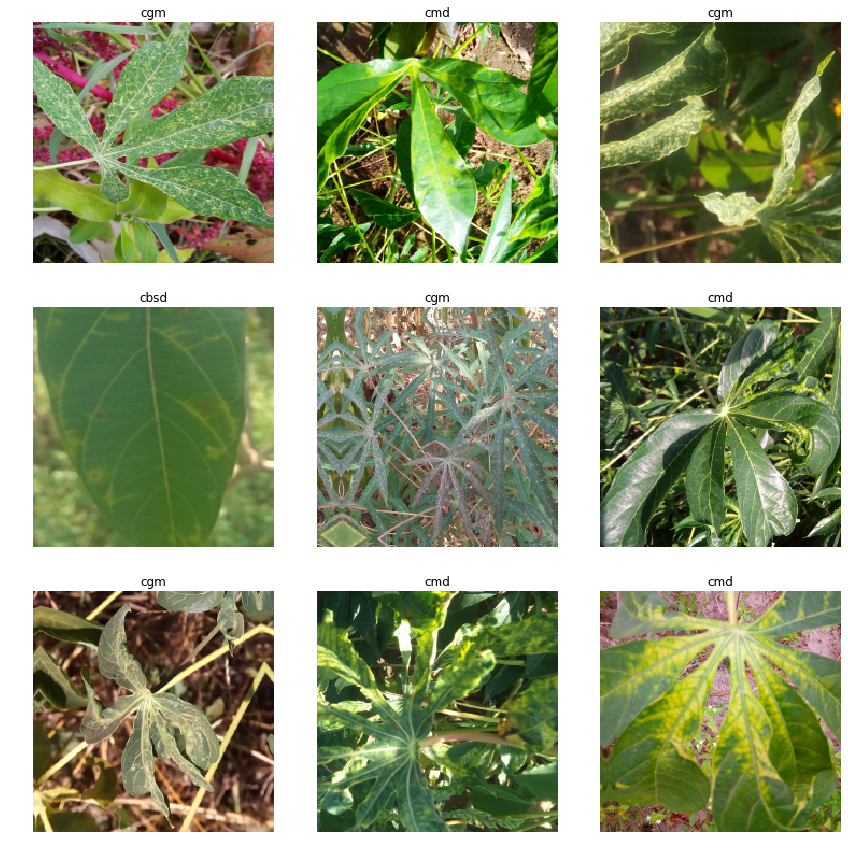

In [0]:
data.show_batch(3)

In [0]:
learnvgg = cnn_learner(data, models.vgg19_bn, metrics=[error_rate,accuracy])

Downloading: "https://download.pytorch.org/models/vgg19_bn-c79401a0.pth" to /root/.cache/torch/checkpoints/vgg19_bn-c79401a0.pth
100%|██████████| 574769405/574769405 [00:10<00:00, 53690516.53it/s]


In [0]:
learnvgg.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.174937,0.697554,0.241379,0.758621,02:52
1,0.846914,0.600337,0.209549,0.790451,02:50
2,0.688125,0.567239,0.192750,0.807250,02:47
3,0.612089,0.563248,0.198939,0.801061,02:49


In [0]:
learnvgg.save('stage-1-vgg',True)

PosixPath('/content/gdrive/My Drive/fastai-v3/cassava/train/models/stage-1-vgg.pth')

In [0]:
learnvgg.unfreeze()
learnvgg.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.547564,0.667953,0.203360,0.796640,02:56
1,0.508962,0.633424,0.199823,0.800177,02:57
2,0.399437,0.430288,0.123784,0.876216,02:55
3,0.282135,0.426249,0.119363,0.880637,02:52


In [0]:
learnvgg.save('vgg-stage2-frozen',True)

PosixPath('/content/gdrive/My Drive/fastai-v3/cassava/train/models/vgg-stage2-frozen.pth')

In [0]:
learnvgg.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


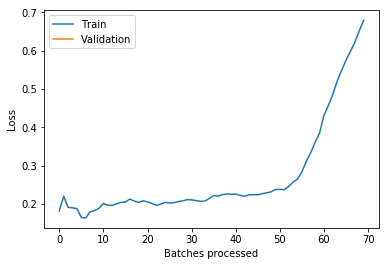

In [0]:
learnvgg.recorder.plot_losses()

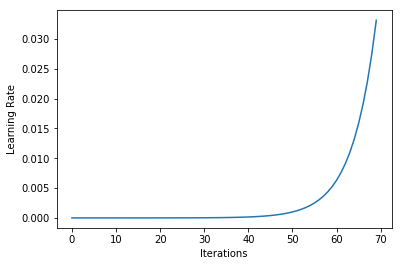

In [0]:
learnvgg.recorder.plot_lr()

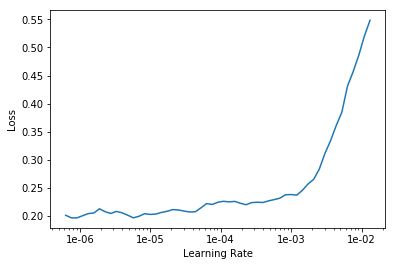

In [0]:
learnvgg.recorder.plot()

In [0]:
learnvgg.save('vgg-stage3-frozen', True)

PosixPath('/content/gdrive/My Drive/fastai-v3/cassava/train/models/vgg-stage3-frozen.pth')

In [0]:
learnvgg.fit_one_cycle(2,max_lr = slice(1e-5,1e-4))

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.207493,0.410079,0.126437,0.873563,02:50
1,0.193376,0.418047,0.122900,0.877100,02:52


In [0]:
# some abracadabra

In [0]:
#Load the last Model before overfitting
learnvgg = cnn_learner(data, models.vgg19_bn, metrics=[error_rate,accuracy])
learnvgg.load("/content/gdrive/My Drive/fastai-v3/cassava/train/models/vgg-stage3-frozen")

Learner(data=ImageDataBunch;

Train: LabelList (4525 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
cgm,cgm,cgm,cgm,cgm
Path: /content/gdrive/My Drive/fastai-v3/cassava/train;

Valid: LabelList (1131 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
cbb,cbsd,cgm,cmd,cbsd
Path: /content/gdrive/My Drive/fastai-v3/cassava/train;

Test: LabelList (3774 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: EmptyLabelList
,,,,
Path: /content/gdrive/My Drive/fastai-v3/cassava/train, model=Sequential(
  (0): Sequential(
    (0): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace)
      (3): Conv2d(64, 64,

In [0]:
#Predict and Interprete
preds,y,losses = learnvgg.get_preds(ds_type= DatasetType.Test,with_loss=True)
interp = ClassificationInterpretation(learnvgg, preds, y, losses)

In [0]:
predictions = np.argmax(preds, axis = 1)
predictions[1:10]

tensor([1, 1, 2, 3, 1, 3, 1, 1, 4])

In [0]:
fnames = [f.name[:] for f in learnvgg.data.test_ds.items]
index2labels = {0:'cbb', 1:'cbsd', 2:'cgm', 3:'cmd', 4:'healthy'}
tempd = pd.DataFrame({'cat':predictions})
tempd['Category'] = tempd['cat'].map(index2labels)
tempd['Id'] = fnames
tempd.drop(['cat'], axis = 1, inplace = True)
tempd.head()

,Category,Id
0,cbsd,test-img-2397.jpg
1,cbsd,test-img-3089.jpg
2,cbsd,test-img-1846.jpg
3,cgm,test-img-863.jpg
4,cmd,test-img-877.jpg


In [0]:
submission_1 = tempd.copy()
submission_1.to_csv('cassava_submission_1.csv', index = False)

In [0]:
!kaggle competitions submit -c cassava-disease -f cassava_submission_1.csv -m " Submitted Successfully"

100% 81.8k/81.8k [00:06<00:00, 12.6kB/s]
Successfully submitted to Cassava Disease Classification 

### **End of VGG** -- Ignore anything after this

In [0]:

submissions  = pd.DataFrame({'Category':labelled_preds, 'Id':fnames}, columns=['Category', 'Id'])

['cbb', 'cbsd', 'cgm', 'cmd', 'healthy']

In [0]:
sample_sub = pd.read_csv(path/'sample_submission_file.csv')
sample_sub.tail()

,Category,Id
3769,cbb,test-img-3769.jpg
3770,cgm,test-img-3770.jpg
3771,healthy,test-img-3771.jpg
3772,cbb,test-img-3772.jpg
3773,healthy,test-img-3773.jpg


,Category,Id,temp
3769,cmd,test-img-3769.jpg,3
3770,cmd,test-img-3770.jpg,3
3771,cmd,test-img-3771.jpg,3
3772,cmd,test-img-3772.jpg,3
3773,cmd,test-img-3773.jpg,3


In [0]:
fnames = [f.name[:] for f in learnvgg.data.test_ds.items]
df = pd.DataFrame({'Category':labelled_preds, 'Id':fnames}, columns=['Category', 'Id'])

In [0]:
test_paths[0:4]

['/content/gdrive/My Drive/fastai-v3/cassava/test/test/0/test-img-2397.jpg',
 '/content/gdrive/My Drive/fastai-v3/cassava/test/test/0/test-img-3089.jpg',
 '/content/gdrive/My Drive/fastai-v3/cassava/test/test/0/test-img-1846.jpg',
 '/content/gdrive/My Drive/fastai-v3/cassava/test/test/0/test-img-863.jpg']

In [0]:
my_submission = pd.DataFrame({'Category':[index2labs[j] for j in predictions],'Id':[i.split("/").pop() for i in test_paths]})

In [0]:
df.drop(['new_cat',	'new_cat_2',	'temp'], axis = 1,inplace = True)
df.head()

,Category,Id
0,cbsd,test-img-0.jpg
1,cbsd,test-img-1.jpg
2,cbsd,test-img-2.jpg
3,cgm,test-img-3.jpg
4,cmd,test-img-4.jpg


In [0]:
#data.test_dl.dl.dataset.x
fn = data.test_ds.items

In [0]:
fn[1]

PosixPath('/content/gdrive/My Drive/fastai-v3/cassava/test/test/0/test-img-3089.jpg')

In [0]:
interp.y_true

tensor([0, 0, 0,  ..., 0, 0, 0])

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=[error_rate,accuracy])

In [0]:
learn.fit_one_cycle(4)

In [0]:
learn.save('stage-1')

In [0]:
learn.unfreeze()

In [0]:
learn.lr_find()

In [0]:
learn.recorder.plot()

In [0]:
#learn.fit_one_cycle(4, max_lr=slice(1e-6,1e-5))
learn.fit_one_cycle(4)

In [0]:
learn18 = cnn_learner(data, models.resnet34, metrics=[error_rate,accuracy])
learn18.fit_one_cycle(4)

In [0]:
learn.save('stage-2')

In [0]:
learnvgg16  = cnn_learner(data, models.vgg16_bn, metrics=[error_rate,accuracy])

In [0]:
learnvgg16.fit_one_cycle(4)


In [0]:
learnvgg16.save('vgg16-stage-1')

In [0]:
learnvgg16.unfreeze()

In [0]:
learnvgg16.lr_find()

In [0]:
learnvgg16.recorder.plot()

In [0]:
learnvgg16.fit_one_cycle(4, max_lr=slice(1e-6, 1e-5))

In [0]:
learnvgg16.save('vgg16-stage-2')

In [0]:
tst = ImageDataBunch.from_folder(path=path/'train', train='.', valid_pct=.15,test = path/'test',
                                  ds_tfms= get_transforms(), size = 224).normalize(imagenet_stats)
                                                                                   
rs_preds, _rs = learn.get_preds(ds_type=DatasetType.Test)

In [0]:
rs_preds.shape

In [0]:
t